In [92]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests 
import time

from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# pip install geopy
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")

from my_functions import *

**WRONG ORIGINS**

Nick Drake = not Myanmar

Frank Turner = not Bahrain

# **Locations Wikipedia scraping**

In [3]:
df_ratings = pd.read_csv('Datasets/df_ratings_top.csv', keep_default_na=False)

print(f"{df_ratings['artist'].nunique()} artists")
print(f"{df_ratings.shape[0]} albums")
print(f"Average of {round(df_ratings.shape[0] / df_ratings['artist'].nunique(), 2)} albums per artist in the df that has all the albums with any ratings")

23683 artists
79625 albums
Average of 3.36 albums per artist in the df that has all the albums with any ratings


In [4]:
df = pd.read_csv('Datasets/df_rock_ratings.csv', keep_default_na=False)

print(f"{df['artist'].nunique()} artists")
print(f"{df.shape[0]} albums")
print(f"Average of {round(df.shape[0] / df['artist'].nunique(), 2)} albums per artist in the subset with the albums with more than 10 votes")

5094 artists
12061 albums
Average of 2.37 albums per artist in the subset with the albums with more than 10 votes


## Testing

In [28]:
df.sample(5)

,artist,title,year,album_length,tracks,genres,styles,release_country,artist_profile
10580,The 1975,A Brief Inquiry into Online Relationships,2018,58.43,15,"['Rock', 'Pop']","['Indie Rock', 'Alternative Rock', 'Indie Pop']",UK & Europe,British indie rock band. \r\n\r\nPop-rock band...
9889,Le Butcherettes,A Raw Youth,2015,0.00,12,['Rock'],[],US,Formed by Teri Gender Bender and Auryn Jolene ...
6394,John Fogerty,Centerfield,1985,35.33,9,['Rock'],"['Pop Rock', 'Folk Rock', 'Country Rock']",US,"American musician, songwriter, and guitarist (..."
4498,L7,The Beauty Process: Triple Platinum,1997,41.57,12,['Rock'],"['Punk', 'Grunge']",US,American grunge punk/alternative rock band fro...
5742,The Fall,Are You Are Missing Winner,2001,47.68,10,['Rock'],"['Garage Rock', 'Punk', 'Rockabilly']",UK,"Post-punk band from Greater Manchester, UK. 19..."


In [125]:
artists = df['artist'].unique()
len(artists)

9616

In [106]:
artists[4155]

'Life at These Speeds'

In [109]:
artist = "AGENT FRESCO"
name_changed = artist.capitalize.replace(' ', '_')
name_changed_band = artist.capitalize.replace(' ', '_') + ('_(band)')
url = f"https://en.wikipedia.org/wiki/{name_changed_band}"

response = requests.get(url).content
soup = BeautifulSoup(response, "html.parser")
origin = soup.select('table tr th', class_='infobox-label')[2].text
location = soup.select('table tr td', class_='infobox-data')[1].text
location


AttributeError: 'builtin_function_or_method' object has no attribute 'replace'

In [116]:
artist = "AABSINTHE"
name_changed = artist.title().replace(' ', '_')
name_changed

'Aabsinthe'

In [116]:
# 0 - Less_Than_Jake_(band): Gainesville, Florida, U.S.
# 1 - Sparta_(band): El Paso, Texas
# 2 - Muse_(band): Teignmouth, Devon, England
# 3 - Finch: no location found
# 4 - Queens_of_the_Stone_Age: Seattle, Washington, U.S.
# 5 - Transplants_(band): additional citations - Los Angeles, California, United States[1]
# 6 - Dream_Theater_(band): Boston, Massachusetts, United States
# 7 - A_Perfect_Circle: Los Angeles, California, U.S.
# 8 - Rooney_(band): additional citations - Los Angeles, California, U.S.
# 9 - AFI_(band): Ukiah, California, U.S.
# 10 - Sublime_(band): Long Beach, California, U.S.
# 11 - The_Cure_(band): Crawley, England
# 12 - blink-182: Poway, California, U.S.
# 13 - Weezer_(band): Los Angeles, California, U.S.
# 14 - Deftones_(band): Sacramento, California, U.S.
# 15 - Jimmy_Eat_World: Mesa, Arizona, U.S.
# 16 - NOFX: Los Angeles, California, U.S.
# 17 - The_Mars_Volta: El Paso, Texas, U.S.
# 18 - Black_Sabbath_(band): Birmingham, England
# 19 - Raised_Fist: Luleå, Norrbotten, Sweden

In [143]:
artist = "Sugarcult"
name_changed = artist.replace(' ', '_')
name_changed_band = artist.replace(' ', '_') + ('_(band)')
url = f"https://en.wikipedia.org/wiki/{name_changed}"

response = requests.get(url).content
soup = BeautifulSoup(response, "html.parser")

# origin = soup.select('table tr th', class_='infobox-label')[2].text
# # location = soup.select('table tr td', class_='infobox-data')[7].text
# location = soup.select('table tr td', class_='infobox-data')[1].text
# location

table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')

table[0].text.split('Origin')[1].split('Genres')[0]
# table[0].text.split(')')[2].split('Genres')[0]
# table[0].text

'Santa Barbara, California, United States'

In [118]:
df.head()

,album_id,artist,album,rating,votes
0,37,Less Than Jake,Losing Streak,3.90,414
1,40,Sparta,Wiretap Scars,3.79,431
2,41,Muse,Absolution,3.99,4411
3,42,Muse,Showbiz,3.50,2181
4,45,Finch,What It Is to Burn,3.69,864


## Changing values

In [127]:
df[df['artist']=='pg.99 / Majority Rule']

,album_id,artist,album,rating,votes


In [122]:
df['artist'] = np.where(df['artist']=='pg.99 / Majority Rule', 'Majority Rule', df['artist'])
df[df['artist']=='pg.99 / Majority Rule']

,album_id,artist,album,rating,votes


In [ ]:
df.to_csv('Datasets/df_ratings.csv', index=False)

### **Testing code for strange cases**

In [ ]:
df = pd.read_csv('Datasets/df_ratings.csv')
artists = df['artist'].unique()

artists_list = []
origin_list = []
count=0

for index in artists[140:150]:

    artists_list.append(index)
    name_changed = index.replace(' ', '_')
    name_changed_band = name_changed + ('_(band)')

    try:
        url = f"https://en.wikipedia.org/wiki/{name_changed_band}"
        response = requests.get(url).content
        soup = BeautifulSoup(response, "html.parser")

        origin = soup.select('table tr th', class_='infobox-label')

        if len(origin) > 0:
            try:
                if origin[2].text == 'Origin':
                    location = soup.select('table tr td', class_='infobox-data')[1].text
                elif origin[3].text == 'Origin':
                    location = soup.select('table tr td', class_='infobox-data')[2].text
                # else:
                    
                if 'multiple issues' in location:
                    location = soup.select('table tr td', class_='infobox-data')[7].text        
                    print(f'{count} - {name_changed_band}: multiple issues - {location}')
                    origin_list.append(location)
                elif 'additional citations' in location:
                    location = soup.select('table tr td', class_='infobox-data')[3].text        
                    print(f'{count} - {name_changed_band}: additional citations - {location}')
                    origin_list.append(location)

                else:
                    print(f'{count} - {name_changed_band}: {location}')
                    origin_list.append(location)
            except:
                print(f'{count} - {name_changed_band}: {location}')
                origin_list.append(location)      
        else:
            try:
                url = f"https://en.wikipedia.org/wiki/{name_changed}"
                response = requests.get(url).content
                soup = BeautifulSoup(response, "html.parser")

                origin = soup.select('table tr th', class_='infobox-label')

                if len(origin) > 0:
                    if origin[2].text == 'Origin':
                        location = soup.select('table tr td', class_='infobox-data')[1].text

                        if 'multiple issues' in location:
                            location = soup.select('table tr td', class_='infobox-data')[7].text        
                            print(f'{count} - {name_changed_band}: multiple issues - {location}')
                            origin_list.append(location)
                        elif 'additional citations' in location:
                            location = soup.select('table tr td', class_='infobox-data')[3].text        
                            print(f'{count} - {name_changed_band}: additional citations - {location}')
                            origin_list.append(location)
                        else:
                            print(f'{count} - {name_changed_band}: {location}')
                            origin_list.append(location)

                    elif origin[3].text == 'Origin':
                        location = soup.select('table tr td', class_='infobox-data')[2].text
                        print(f'{count} - {name_changed_band}: {location}')
                        origin_list.append(location) 

                    else:
                        print(f'{count} - {index}: no location found')
                        origin_list.append(np.nan)  
                else:
                    print(f'{count} - {index}: short length')
                    origin_list.append(np.nan)
            except:
                print(f'{count} - {index}: error')
                origin_list.append(np.nan)
    except:
        print(f'{count} - {index}: error')
        origin_list.append(np.nan)

    if len(artists_list) != len(origin_list):
        print('different lengths')
        break

    count+=1

0 - Funeral_for_a_Friend_(band): Bridgend, Wales
1 - Millencolin_(band): multiple issues - Örebro, Sweden
2 - The_Flaming_Lips_(band): Oklahoma City, Oklahoma, U.S.
3 - Feeder_(band): Feeder in 2008
4 - Descendents_(band): Manhattan Beach, California, U.S.
5 - PJ Harvey: no location found
6 - Godsmack_(band): Lawrence, Massachusetts U.S.
7 - Blind_Faith_(band): Ripley, Surrey, England
8 - Van_Halen_(band): Pasadena, California, U.S.
9 - Damageplan_(band): Dallas, Texas, U.S.


## **Defining the function** to get the origins from Wikipedia

In [ ]:
def get_origins_wikipedia(df, start_index, final_index):
    df = pd.read_csv('Datasets/df_rock_ratings.csv')
    artists = df['artist'].unique()

    try:
    # import the DataFrame with the locations whose coordinates I already have
        df_coordinates_scraped = pd.read_csv('Datasets/df_coordinates.csv')
        print('Bingo! df_coordinates.csv found \n')
    except: 
        print('df_coordinates.csv not found \n')

    artists_list = []
    origin_list = []
    count=0
    scraped=0

    for index in artists[start_index:final_index]:

        name_changed = index.replace(' ', '_')
        name_changed_band = name_changed + ('_(band)')

        try:
            url = f"https://en.wikipedia.org/wiki/{name_changed_band}"
            response = requests.get(url).content
            soup = BeautifulSoup(response, "html.parser")

            table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')

            location = table[0].text.split('Origin')[1].split('Genres')[0]
            city = location.split(', ')[0]
            count+=1
            
        # save info in lists
            artists_list.append(index)  
            origin_list.append(location)
            scraped+=1
            print(f'{scraped}/{count} - {name_changed_band}: {location}')

        except:
            try:
                url = f"https://en.wikipedia.org/wiki/{name_changed}"
                response = requests.get(url).content
                soup = BeautifulSoup(response, "html.parser")
                table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')

                try:
                    location = table[0].text.split('Origin')[1].split('Genres')[0]
                    city = location.split(', ')[0]
                    count+=1 
    
                # save info in lists
                    artists_list.append(index)  
                    origin_list.append(location)
                    scraped+=1
                    print(f'{scraped}/{count} - {name_changed}: {location}')

                except:
                    location = table[0].text.split(')')[2].split('Genres')[0]
                    city = location.split(', ')[0]
                    count+=1

                # save info in lists
                    artists_list.append(index)  
                    origin_list.append(location)
                    scraped+=1
                    print(f'{scraped}/{count} - {name_changed} (individual): {location}')

            except:
                try:
                    url = f"https://es.wikipedia.org/wiki/{name_changed}"
                    response = requests.get(url).content
                    soup = BeautifulSoup(response, "html.parser")

                    table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')
                    location = table[0].text.split('Origen\n')[1].split(' Información')[0]
                    city = location.split(', ')[0]
                    count+=1    
    
                # save info in lists
                    artists_list.append(index)  
                    origin_list.append(location)
                    scraped+=1
                    print(f'{scraped}/{count} - {name_changed} (español): {location}')

                except:
                    scraped+=1
                    print(f'{scraped}/{count} - {index}: error')
                    artists_list.append(index) 
                    origin_list.append(np.nan)

        if len(artists_list) != len(origin_list):
            print('different lengths')
            break

    df_artists_origins = pd.DataFrame({'artist': artists_list
                             , 'origin': origin_list})
    
    return df_artists_origins

## **Defining the functions**

In [102]:
def get_new_artists(df_artists_origins):

# import the df with the artists' origins already scraped
    df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')

    if df_artists_origins['origin'].isna().sum() == 0:        
        print("No null values, but let's take a look just in case there are weird locations")

    else: 
    # take a look at the df with the new artists and make sure there are non null values in origin (when it couldn't find it in Wikipedia)
        print(f'{round(df_artists_origins['origin'].isna().sum() / df_artists_origins.shape[0]*100, 2)} % of nulls')
    
# subset of the new artists I just got, wether there are null values or not
    df_new_artists = df_artists_origins[~df_artists_origins['artist'].isin(df_artists_origins_scraped['artist'].values)]

    print("Here is the dataframe with the new artists, without duplicates")
    return df_new_artists   # so I can take a look at it and then continue

In [43]:
def export_artists_origins_concat(df_new_artists):

# import the df with the artists' origins already scraped
    df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')

# concat with the df I just got
    df_artists_origins_concat = pd.concat([df_artists_origins_scraped, df_new_artists])
    df_artists_origins_concat.drop_duplicates(inplace=True)     # just in case
    df_artists_origins_concat.reset_index(drop=True, inplace=True)

# export all the artists and their origins to a .csv file (the ones I got plus the new artists)
    df_artists_origins_concat.to_csv('Datasets/df_artists_origins.csv', index=False)
    print('df_artists_origins_concat exported to .csv')
    print(df_artists_origins_concat.shape)

In [55]:
def get_coordinates_geopy(df_new_artists):
    
# replace special characters for spaces
    df_new_artists['origin_clean'] = df_new_artists['origin'].str.replace('.', '')
    df_new_artists['origin_clean'] = df_new_artists['origin_clean'].str.replace(r'\[\d+\]', '', regex=True)

# show the df to check it has been changed correctly
    print(f'{df_new_artists.tail()}\n')

# run the function that gets the coordinates from the origins from Geopy
    geolocator = Nominatim(user_agent="music_analysis")

    # the origins of the bands I just scraped from Wikipedia
    unique_origins_clean = df_new_artists['origin_clean'].unique()
    unique_origins = df_new_artists['origin'].unique()

    country_list = []
    city_list = []
    latitude_list = []
    longitude_list = []
    address_list = []
    count = 0

    for origin in unique_origins_clean:
        count+=1
        time.sleep(1)
        location = geolocator.geocode(origin)

        print(f'{count}/{len(unique_origins_clean)} - {location.address}')  

    # save the info in lists
        country_list.append(location.address.split(', ')[-1])
        city_list.append(origin.split(', ')[0])
        latitude_list.append(location.latitude)
        longitude_list.append(location.longitude)
        address_list.append(location.address)

    df_coordinates = pd.DataFrame({'country': country_list
                                , 'city': city_list
                                , 'origin': unique_origins
                                , 'origin_clean': unique_origins_clean
                                , 'latitude': latitude_list
                                , 'longitude': longitude_list
                                , 'address': address_list})
    df_coordinates.sort_values(['country', 'city'], inplace=True) # sort by country and city
    df_coordinates.reset_index(drop=True, inplace=True)

    return df_coordinates

In [83]:
def export_coordinates_concat(df_coordinates):

# import the last df that contains the coordinates of the unique origins
    df_coordinates_scraped = pd.read_csv('Datasets/df_coordinates.csv')
    print(f"df_coordinates_scraped: {df_coordinates_scraped.shape}\n")

# concat with the df of the coordinates I just got
    df_coordinates_concat = pd.concat([df_coordinates_scraped, df_coordinates])
    df_coordinates_concat.sort_values(['country', 'city'], inplace=True) # sort by country and city
    df_coordinates_concat.reset_index(drop=True, inplace=True)

# look for duplicates in the origin, between the locations I had already gotten and the new ones
    check_duplicates_origins(df_coordinates_concat)

# save it in a csv file (the coordinates I had plus the ones from the new artists I just got)
    df_coordinates_concat.to_csv('Datasets/df_coordinates.csv', index=False)
    print('df_coordinates_concat exported to .csv')

In [69]:
def merge_origins_coordinates(df_new_artists):

# import the last df that contains the coordinates of the unique origins
    df_coordinates_concat = pd.read_csv('Datasets/df_coordinates.csv')

# merge with the previous df with the artists
    df_artists_origins_coordinates = pd.merge(df_new_artists, df_coordinates_concat, on=['origin'])
    df_artists_origins_coordinates.drop(columns=['origin', 'origin_clean_x', 'origin_clean_y'], inplace=True)
    print("Merged artists with coordinates!")

# import the df that contains info of the artists and the coordinates of their origins
    df_artists_origins_coordinates_scraped = pd.read_csv('Datasets/df_artists_origins_coordinates.csv')

# concat to get the df with all the artists, origins and their coordinates
    df_artists_origins_coordinates_concat = pd.concat([df_artists_origins_coordinates_scraped, df_artists_origins_coordinates])
    df_artists_origins_coordinates_concat.reset_index(drop=True, inplace=True)

# save it in a csv file
    df_artists_origins_coordinates_concat.to_csv('Datasets/df_artists_origins_coordinates.csv', index=False)
    print("Exported to a .csv file")

    return df_artists_origins_coordinates_concat

## **Code to execute the functions**

In [72]:
# I have to import this df for the function to properly work
df = pd.read_csv('Datasets/df_rock_ratings.csv')

In [99]:
# create the df with the origins scraped from Wikipedia
df_artists_origins = get_origins_wikipedia(df, 75, 85)

Bingo! df_coordinates.csv found 

1/1 - The_Allman_Brothers_Band: Jacksonville, Florida, U.S.
2/2 - Iced_Earth: Tampa, Florida, U.S.
3/3 - Phish: Burlington, Vermont, U.S.
4/4 - Cream_(band): London, England
5/5 - Electric_Six: Detroit, Michigan, U.S.
6/6 - Dark_Angel_(band): Downey, California, U.S.
7/7 - Sepultura: Belo Horizonte, Minas Gerais, Brazil
8/8 - Exodus_(band): Richmond, California, U.S.
9/9 - Big_Star_(band): Memphis, Tennessee, U.S.
10/10 - Silverchair_(band): Newcastle, New South Wales, Australia


In [100]:
# show me the df of the artists and their origins I just got from Wikipedia
df_artists_origins

,artist,origin
0,The Allman Brothers Band,"Jacksonville, Florida, U.S."
1,Iced Earth,"Tampa, Florida, U.S."
2,Phish,"Burlington, Vermont, U.S."
3,Cream,"London, England"
4,Electric Six,"Detroit, Michigan, U.S."
5,Dark Angel,"Downey, California, U.S."
6,Sepultura,"Belo Horizonte, Minas Gerais, Brazil"
7,Exodus,"Richmond, California, U.S."
8,Big Star,"Memphis, Tennessee, U.S."
9,Silverchair,"Newcastle, New South Wales, Australia"


In [101]:
# create a subset of the new artists I just got, tell me if there are nulls and show the new df

df_new_artists = get_new_artists(df_artists_origins)
df_new_artists

No null values, but let's take a look just in case there are weird locations


,artist,origin
5,Dark Angel,"Downey, California, U.S."
6,Sepultura,"Belo Horizonte, Minas Gerais, Brazil"
7,Exodus,"Richmond, California, U.S."
8,Big Star,"Memphis, Tennessee, U.S."
9,Silverchair,"Newcastle, New South Wales, Australia"


### If there are null or wrong values

In [ ]:
df_artists_origins['origin'].isna().sum()

0

In [ ]:
# percentage of nulls
print(f'{round(df_artists_origins['origin'].isna().sum() / df_artists_origins.shape[0]*100, 2)} % of nulls')

0.0 % of nulls


In [ ]:
df_artists_origins[df_artists_origins['origin'].isna()]

,artist,origin


**Let's search for these bands manually**

In [ ]:
# df_ratings[df_ratings['artist']=='Incubus (USA-CA)']

In [ ]:
df_artists_origins['origin'] = np.where(df_artists_origins['artist']=='The Flower Kings', 'Uppsala, Sweden', df_artists_origins['origin'])

In [ ]:
# now there should be no more null values
df_artists_origins['origin'].isna().sum()

0

#### Changing df_ratings in case needed

In [ ]:
# df_ratings['artist'] = np.where(df_ratings['artist']=='Incubus (USA-CA)', 'Incubus', df_ratings['artist'])
# df_ratings[df_ratings['artist']=='Incubus (USA-CA)']

,album_id,artist,album,rating,votes


In [ ]:
# df_ratings.to_csv('Datasets/df_ratings_top.csv', index=False)

## **Export to .csv**

In [103]:
export_artists_origins_concat(df_new_artists)

df_artists_origins_concat exported to .csv
(85, 2)


## **GeoPy**

In [104]:
df_coordinates = get_coordinates_geopy(df_new_artists)
df_coordinates

        artist                                 origin  \
5   Dark Angel               Downey, California, U.S.   
6    Sepultura   Belo Horizonte, Minas Gerais, Brazil   
7       Exodus             Richmond, California, U.S.   
8     Big Star               Memphis, Tennessee, U.S.   
9  Silverchair  Newcastle, New South Wales, Australia   

                            origin_clean  
5                 Downey, California, US  
6   Belo Horizonte, Minas Gerais, Brazil  
7               Richmond, California, US  
8                 Memphis, Tennessee, US  
9  Newcastle, New South Wales, Australia  

1/5 - Downey, Los Angeles County, California, United States
2/5 - Belo Horizonte, Região Geográfica Imediata de Belo Horizonte, Região Metropolitana de Belo Horizonte, Região Geográfica Intermediária de Belo Horizonte, Minas Gerais, Região Sudeste, Brasil
3/5 - Richmond, Contra Costa County, California, United States
4/5 - Memphis, Shelby County, West Tennessee, Tennessee, United States
5/5 - Ne

,country,city,origin,origin_clean,latitude,longitude,address
0,Australia,Newcastle,"Newcastle, New South Wales, Australia","Newcastle, New South Wales, Australia",-32.919295,151.779535,"Newcastle, Newcastle-Maitland, City of Newcast..."
1,Brasil,Belo Horizonte,"Belo Horizonte, Minas Gerais, Brazil","Belo Horizonte, Minas Gerais, Brazil",-19.922732,-43.945095,"Belo Horizonte, Região Geográfica Imediata de ..."
2,United States,Downey,"Downey, California, U.S.","Downey, California, US",33.940444,-118.129285,"Downey, Los Angeles County, California, United..."
3,United States,Memphis,"Memphis, Tennessee, U.S.","Memphis, Tennessee, US",35.146025,-90.051764,"Memphis, Shelby County, West Tennessee, Tennes..."
4,United States,Richmond,"Richmond, California, U.S.","Richmond, California, US",37.935758,-122.347748,"Richmond, Contra Costa County, California, Uni..."


In [105]:
export_coordinates_concat(df_coordinates)

df_coordinates_scraped: (67, 7)

No duplicates
df_coordinates_concat exported to .csv


In [106]:
df_artists_origins_coordinates_concat = merge_origins_coordinates(df_new_artists)

Merged artists with coordinates!
Exported to a .csv file


<Axes: xlabel='count', ylabel='country'>

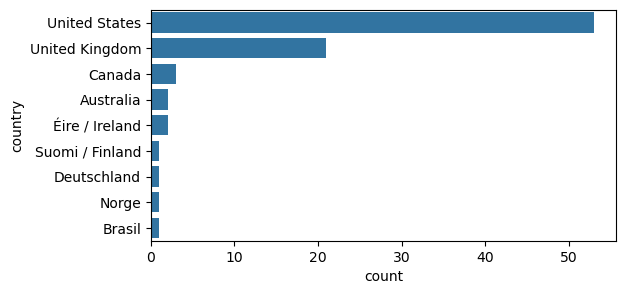

In [107]:
order = df_artists_origins_coordinates_concat['country'].value_counts().index

plt.figure(figsize=(6,3))
sns.countplot(df_artists_origins_coordinates_concat['country'], order=order)

# All separate codes without functions

## Actual code to get the origins from Wikipedia

In [42]:
artists_list, origin_list = get_origins_wikipedia(df, 20, 50)

Bingo! df_coordinates.csv found 

1/1 - The_New_Pornographers: Vancouver, British Columbia, Canada
2/2 - Regurgitator_(band): Brisbane, Queensland, Australia
3/3 - Sunny_Day_Real_Estate: Seattle, Washington, U.S.
4/4 - ...And_You_Will_Know_Us_by_the_Trail_of_Dead: Austin, Texas, U.S.
5/5 - Children_of_Bodom_(band): Espoo, Finland
6/6 - Audioslave: Glendale, California, U.S.
7/7 - Led_Zeppelin_(band): London, England
8/8 - Less_Than_Jake_(band): Gainesville, Florida, U.S.
9/9 - Alexisonfire: St. Catharines, Ontario, Canada
10/10 - Rammstein: Berlin, Germany
11/11 - Thrice_(band): Irvine, California, U.S.
12/12 - Lostprophets: Pontypridd, Wales
13/13 - New_Found_Glory_(band): Coral Springs, Florida, U.S.
14/14 - Placebo_(band): London, England
15/15 - Box_Car_Racer: San Diego, California, U.S.
16/16 - Thursday_(band): New Brunswick, New Jersey, U.S.
17/17 - Million_Dead: London, England
18/18 - The_Jesus_Lizard: Austin, Texas, U.S.
19/19 - The_Offspring_(band): Garden Grove, California, 

## Saving the data into a dataframe

In [43]:
df_artists_origins = pd.DataFrame({'artist': artists_list
                             , 'origin': origin_list})
df_artists_origins.shape

(30, 2)

In [44]:
df_artists_origins

,artist,origin
0,The New Pornographers,"Vancouver, British Columbia, Canada"
1,Regurgitator,"Brisbane, Queensland, Australia"
2,Sunny Day Real Estate,"Seattle, Washington, U.S."
3,...And You Will Know Us by the Trail of Dead,"Austin, Texas, U.S."
4,Children of Bodom,"Espoo, Finland"
5,Audioslave,"Glendale, California, U.S."
6,Led Zeppelin,"London, England"
7,Less Than Jake,"Gainesville, Florida, U.S."
8,Alexisonfire,"St. Catharines, Ontario, Canada"
9,Rammstein,"Berlin, Germany"


In [ ]:
# import the df with the artists' origins already scraped
df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')
df_artists_origins_scraped.shape

(20, 2)

In [ ]:
# subset of the new artists I just got
df_new_artists = df_artists_origins[~df_artists_origins['artist'].isin(df_artists_origins_scraped['artist'].values)]
df_new_artists

,artist,origin
0,The New Pornographers,"Vancouver, British Columbia, Canada"
1,Regurgitator,"Brisbane, Queensland, Australia"
2,Sunny Day Real Estate,"Seattle, Washington, U.S."
3,...And You Will Know Us by the Trail of Dead,"Austin, Texas, U.S."
4,Children of Bodom,"Espoo, Finland"
5,Audioslave,"Glendale, California, U.S."
6,Led Zeppelin,"London, England"
7,Less Than Jake,"Gainesville, Florida, U.S."
8,Alexisonfire,"St. Catharines, Ontario, Canada"
9,Rammstein,"Berlin, Germany"


In [ ]:
# concat with the df I just got
df_artists_origins_concat = pd.concat([df_artists_origins_scraped, df_new_artists])
df_artists_origins_concat.reset_index(drop=True, inplace=True)
df_artists_origins_concat.shape

(50, 2)

I want to already export it to a .csv file so that later I can check the ``origin`` the next time I run the function and compare if I have scraped that origin already or not.

In [ ]:
# export all the artists and their origins to a .csv file (the ones I got plus the new artists)
df_artists_origins_concat.to_csv('Datasets/df_artists_origins.csv', index=False)

## ``origin`` cleaning: dots, [ ]...

The next thing I'm gonna do is cleaning the origin, because Geopy doesn't read correctly characters like "U.S.".

**Clean the ``origin`` column of all the artists, so I can look for the coordinates with Geopy**

In [50]:
df_new_artists.shape

(30, 2)

In [52]:
# replace special characters for spaces
df_new_artists['origin_clean'] = df_new_artists['origin'].str.replace('.', '')
df_new_artists['origin_clean'] = df_new_artists['origin_clean'].str.replace(r'\[\d+\]', '', regex=True)

# show the df to check it has been changed correctly
df_new_artists.tail()

,artist,origin,origin_clean
25,KISS,"New York City, U.S.","New York City, US"
26,The Polyphonic Spree,"Dallas, Texas, United States","Dallas, Texas, United States"
27,Cake,"Sacramento, California, U.S.","Sacramento, California, US"
28,Dinosaur Jr.,"Amherst, Massachusetts, U.S.","Amherst, Massachusetts, US"
29,U2,"Dublin, Ireland","Dublin, Ireland"


## Concat with the previous df

In [59]:
# import the last df that contains the coordinates of the unique origins
df_coordinates_scraped = pd.read_csv('Datasets/df_coordinates.csv')
df_coordinates_scraped.shape

(42, 7)

In [62]:
df_coordinates_scraped.head()

,country,city,origin,origin_clean,latitude,longitude,address
0,Australia,Brisbane,"Brisbane, Queensland, Australia","Brisbane, Queensland, Australia",-27.468968,153.023499,"City of Brisbane, Queensland, Australia"
1,Canada,St Catharines,"St. Catharines, Ontario, Canada","St Catharines, Ontario, Canada",43.157981,-79.244100,"St. Catharines, Niagara Region, Golden Horsesh..."
2,Canada,Vancouver,"Vancouver, British Columbia, Canada","Vancouver, British Columbia, Canada",49.260872,-123.113952,"Vancouver, Metro Vancouver Regional District, ..."
3,Deutschland,Berlin,"Berlin, Germany","Berlin, Germany",52.510885,13.398937,"Berlin, Pankow, Deutschland"
4,Suomi / Finland,Espoo,"Espoo, Finland","Espoo, Finland",60.204965,24.655981,"Espoo, Helsingin seutukunta, Uusimaa, Manner-S..."


In [ ]:
# concat with the df of the coordinates I just got
df_coordinates_concat = pd.concat([df_coordinates_scraped, df_coordinates])
df_coordinates_concat.sort_values(['country', 'city'], inplace=True) # sort by country and city
df_coordinates_concat.reset_index(drop=True, inplace=True)
df_coordinates_concat.shape

(43, 7)

In [59]:
# look for duplicates in the origin, between the locations I had already gotten and the new ones
check_duplicates_origins(df_coordinates_concat)

Found 1 duplicates:
     city         country
9  London  United Kingdom

Resulting dataset: (42, 7)


In [60]:
# save it in a csv file (the coordinates I had plus the ones from the new artists I just got)
df_coordinates_concat.to_csv('Datasets/df_coordinates.csv', index=False)

## **Merge ``origin`` with ``coordinates``**

In [66]:
df_new_artists

,artist,origin,origin_clean
0,The Clash,"London, England","London, England"
1,Darkthrone,"Kolbotn, Akershus, Norway","Kolbotn, Akershus, Norway"
2,Ramones,"Forest Hills, Queens, New York, U.S.","Forest Hills, Queens, New York, US"
3,Comets on Fire,"Santa Cruz, California, U.S.","Santa Cruz, California, US"
4,Fenix TX,"Houston, Texas, U.S.","Houston, Texas, US"
5,Incubus,"Calabasas, California, U.S.","Calabasas, California, US"
6,Feeder,"Newport, Wales","Newport, Wales"
7,PJ Harvey,"Bridport, Dorset, England","Bridport, Dorset, England"
8,Sebadoh,"Northampton, Massachusetts, U.S.","Northampton, Massachusetts, US"
9,Blind Faith,"Ripley, Surrey, England","Ripley, Surrey, England"


In [62]:
# merge with the previous df with the artists
df_artists_origins_coordinates = pd.merge(df_new_artists, df_coordinates_concat, on=['origin'])
df_artists_origins_coordinates.drop(columns=['origin', 'origin_clean_x', 'origin_clean_y'], inplace=True)

df_artists_origins_coordinates

,artist,country,city,latitude,longitude,address
0,The New Pornographers,Canada,Vancouver,49.260872,-123.113952,"Vancouver, Metro Vancouver Regional District, ..."
1,Regurgitator,Australia,Brisbane,-27.468968,153.023499,"City of Brisbane, Queensland, Australia"
2,Sunny Day Real Estate,United States,Seattle,47.603832,-122.330062,"Seattle, King County, Washington, United States"
3,...And You Will Know Us by the Trail of Dead,United States,Austin,30.271129,-97.743700,"Austin, Travis County, Texas, United States"
4,Children of Bodom,Suomi / Finland,Espoo,60.204965,24.655981,"Espoo, Helsingin seutukunta, Uusimaa, Manner-S..."
5,Audioslave,United States,Glendale,34.146942,-118.247847,"Glendale, Los Angeles County, California, Unit..."
6,Led Zeppelin,United Kingdom,London,51.489334,-0.144055,"London, Greater London, England, United Kingdom"
7,Less Than Jake,United States,Gainesville,29.651968,-82.324985,"Gainesville, Alachua County, Florida, United S..."
8,Alexisonfire,Canada,St Catharines,43.157981,-79.244100,"St. Catharines, Niagara Region, Golden Horsesh..."
9,Rammstein,Deutschland,Berlin,52.510885,13.398937,"Berlin, Pankow, Deutschland"


In [63]:
# locations of the new artists
df_artists_origins_coordinates['country'].value_counts()

country
United States      18
United Kingdom      5
Canada              2
Éire / Ireland      2
Australia           1
Suomi / Finland     1
Deutschland         1
Name: count, dtype: int64

In [ ]:
# import the df that contains info of the artists and the coordinates of their origins
df_artists_origins_coordinates_scraped = pd.read_csv('Datasets/df_artists_origins_coordinates.csv')
df_artists_origins_coordinates_scraped

,artist,country,city,latitude,longitude,address
0,Sparta,United States,El Paso,31.760116,-106.487040,"El Paso, El Paso County, Texas, United States"
1,Muse,United Kingdom,Teignmouth,50.546338,-3.495780,"Teignmouth, Teignbridge, Devon, England, Unite..."
2,Finch,United States,Temecula,33.494635,-117.147366,"Temecula, Riverside County, California, United..."
3,Transplants,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
4,Rooney,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
5,The Cure,United Kingdom,Crawley,51.110344,-0.180109,"Crawley, West Sussex, England, United Kingdom"
6,AFI,United States,Ukiah,39.150166,-123.207786,"Ukiah, Mendocino County, California, 95482, Un..."
7,Jimmy Eat World,United States,Mesa,33.415101,-111.831455,"Mesa, Maricopa County, Arizona, United States"
8,Black Sabbath,United Kingdom,Birmingham,52.479699,-1.902691,"Birmingham, West Midlands, England, United Kin..."
9,Yes,United Kingdom,London,51.489334,-0.144055,"London, Greater London, England, United Kingdom"


In [ ]:
df_artists_origins_coordinates_concat = pd.concat([df_artists_origins_coordinates_scraped, df_artists_origins_coordinates])
df_artists_origins_coordinates_concat.reset_index(drop=True, inplace=True)
df_artists_origins_coordinates_concat

,artist,country,city,latitude,longitude,address
0,Sparta,United States,El Paso,31.760116,-106.487040,"El Paso, El Paso County, Texas, United States"
1,Muse,United Kingdom,Teignmouth,50.546338,-3.495780,"Teignmouth, Teignbridge, Devon, England, Unite..."
2,Finch,United States,Temecula,33.494635,-117.147366,"Temecula, Riverside County, California, United..."
3,Transplants,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
4,Rooney,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
5,The Cure,United Kingdom,Crawley,51.110344,-0.180109,"Crawley, West Sussex, England, United Kingdom"
6,AFI,United States,Ukiah,39.150166,-123.207786,"Ukiah, Mendocino County, California, 95482, Un..."
7,Jimmy Eat World,United States,Mesa,33.415101,-111.831455,"Mesa, Maricopa County, Arizona, United States"
8,Black Sabbath,United Kingdom,Birmingham,52.479699,-1.902691,"Birmingham, West Midlands, England, United Kin..."
9,Yes,United Kingdom,London,51.489334,-0.144055,"London, Greater London, England, United Kingdom"


In [66]:
# save it in a csv file
df_artists_origins_coordinates_concat.to_csv('Datasets/df_artists_origins_coordinates.csv', index=False)

In [67]:
df_artists_origins_coordinates_concat.country.value_counts()

country
United States      30
United Kingdom     13
Canada              2
Éire / Ireland      2
Australia           1
Suomi / Finland     1
Deutschland         1
Name: count, dtype: int64